In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(**{'figure.dpi':150})
plt.style.use('ggplot') # can skip this - plots are more visually appealing with this style

## Read in the datasets and extract a subset for each

In [2]:
use_cols = [
    # 29 columns out of 109
    "Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime",
    "ArrTime", "CRSArrTime", "Reporting_Airline","Flight_Number_Reporting_Airline", 
    "Tail_Number", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest",
    "Distance", "TaxiIn", "TaxiOut", "Cancelled",
    "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",
    "LateAircraftDelay"
]

In [3]:
jan = pd.read_csv(
    'On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv',usecols=use_cols
)
print(f'Number of observations in Jan 2019: {jan.shape[0]}')

Number of observations in Jan 2019: 583985


/var/folders/w8/7dx9yg1j43jglxvln5g6g3r00000gn/T/ipykernel_24413/2942011216.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  jan = pd.read_csv(


In [4]:
# rename a a few columns
jan.rename(
    columns={
        "Reporting_Airline":"UniqueCarrier", 
        "Flight_Number_Reporting_Airline":"FlightNum", 
        "Tail_Number":"TailNum"
    }, 
    inplace=True
)

In [27]:
# randomly sample 100k observations and perform analysis on this subset
jan = jan.sample(n=100000,random_state=1)

In [28]:
# repeat the same procedure on the July 2019 data
jul = pd.read_csv(
    'On_Time_Reporting_Carrier_On_Time_Performance_2019_7.csv',usecols=use_cols
)
print(f'Number of observations in July 2019: {jul.shape[0]}')

# rename a a few columns
jul.rename(
    columns={
        "Reporting_Airline":"UniqueCarrier", 
        "Flight_Number_Reporting_Airline":"FlightNum", 
        "Tail_Number":"TailNum"
    }, 
    inplace=True
)

# randomly sample 100k observations and perform analysis on this subset
jul = jul.sample(n=100000,random_state=1)

Number of observations in July 2019: 659029


/var/folders/w8/7dx9yg1j43jglxvln5g6g3r00000gn/T/ipykernel_24413/1650648935.py:2: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  jul = pd.read_csv(


## EDA

In [6]:
# first 5 rows of Jan data
jan.head(5)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,FlightNum,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019,1,4,5,OO,N945SW,5657,SBP,SFO,1400,...,0,70.0,51.0,37.0,190,NaN,NaN,NaN,NaN,NaN
1,2019,1,4,5,OO,N932SW,5658,IAH,XNA,935,...,0,103.0,109.0,76.0,438,NaN,NaN,NaN,NaN,NaN
2,2019,1,4,5,OO,N932SW,5658,SGF,IAH,643,...,0,132.0,121.0,88.0,513,NaN,NaN,NaN,NaN,NaN
3,2019,1,4,5,OO,N916SW,5659,ISN,DEN,1335,...,0,118.0,110.0,80.0,576,NaN,NaN,NaN,NaN,NaN
4,2019,1,4,5,OO,N107SY,5660,MKE,DEN,836,...,0,184.0,163.0,127.0,896,NaN,NaN,NaN,NaN,NaN


In [31]:
def get_info(pd_frame):
    res = pd_frame.describe().transpose()
    res['missing_percent'] = [(pd_frame.shape[0] - res.loc[ind, 'count'])/pd_frame.shape[0] for ind in res.index]
    res['unique_val'] = [len(pd_frame.loc[:,ind].value_counts()) for ind in res.index]
    res['var_type'] = ['Continuous' if res.loc[ind, 'unique_val'] >=100 else 'Categorical' for ind in res.index]
    return res

In [35]:
jan_info = get_info(jan)
jan_info

,count,mean,std,min,25%,50%,75%,max,missing_percent,unique_val,var_type
Year,100000.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0,0.00000,1,Categorical
Month,100000.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,0.00000,1,Categorical
DayofMonth,100000.0,15.921430,8.980433,1.0,8.0,16.0,24.0,31.0,0.00000,31,Categorical
DayOfWeek,100000.0,3.830870,1.920896,1.0,2.0,4.0,5.0,7.0,0.00000,7,Categorical
FlightNum,100000.0,2535.598870,1820.716133,1.0,985.0,2111.0,3896.0,7439.0,0.00000,6482,Continuous
CRSDepTime,100000.0,1324.782600,483.773916,1.0,915.0,1320.0,1730.0,2359.0,0.00000,1212,Continuous
DepTime,97190.0,1329.857866,495.278799,1.0,920.0,1326.0,1737.0,2400.0,0.02810,1355,Continuous
DepDelay,97190.0,9.636012,48.173583,-46.0,-6.0,-3.0,5.0,1500.0,0.02810,583,Continuous
TaxiOut,97140.0,18.332582,10.921151,1.0,12.0,15.0,21.0,181.0,0.02860,138,Continuous
TaxiIn,97074.0,7.610957,6.079588,1.0,4.0,6.0,9.0,282.0,0.02926,100,Continuous


In [36]:
jul_info = get_info(jul)
jul_info

,count,mean,std,min,25%,50%,75%,max,missing_percent,unique_val,var_type
Year,100000.0,2019.000000,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0,0.00000,1,Categorical
Month,100000.0,7.000000,0.000000,7.0,7.0,7.0,7.0,7.0,0.00000,1,Categorical
DayofMonth,100000.0,16.248200,8.848690,1.0,9.0,16.0,24.0,31.0,0.00000,31,Categorical
DayOfWeek,100000.0,3.761740,2.007360,1.0,2.0,4.0,5.0,7.0,0.00000,7,Categorical
FlightNum,100000.0,2564.448680,1784.995915,1.0,1050.0,2214.0,3899.0,7439.0,0.00000,6343,Continuous
CRSDepTime,100000.0,1335.421270,499.863919,5.0,911.0,1325.0,1745.0,2359.0,0.00000,1194,Continuous
DepTime,98152.0,1335.826320,520.249159,1.0,909.0,1325.0,1753.0,2400.0,0.01848,1365,Continuous
DepDelay,98151.0,14.365417,56.442770,-32.0,-5.0,-2.0,9.0,1462.0,0.01849,649,Continuous
TaxiOut,98042.0,17.345250,10.507213,1.0,11.0,15.0,20.0,164.0,0.01958,149,Continuous
TaxiIn,98014.0,8.003775,6.928073,1.0,4.0,6.0,9.0,198.0,0.01986,121,Continuous


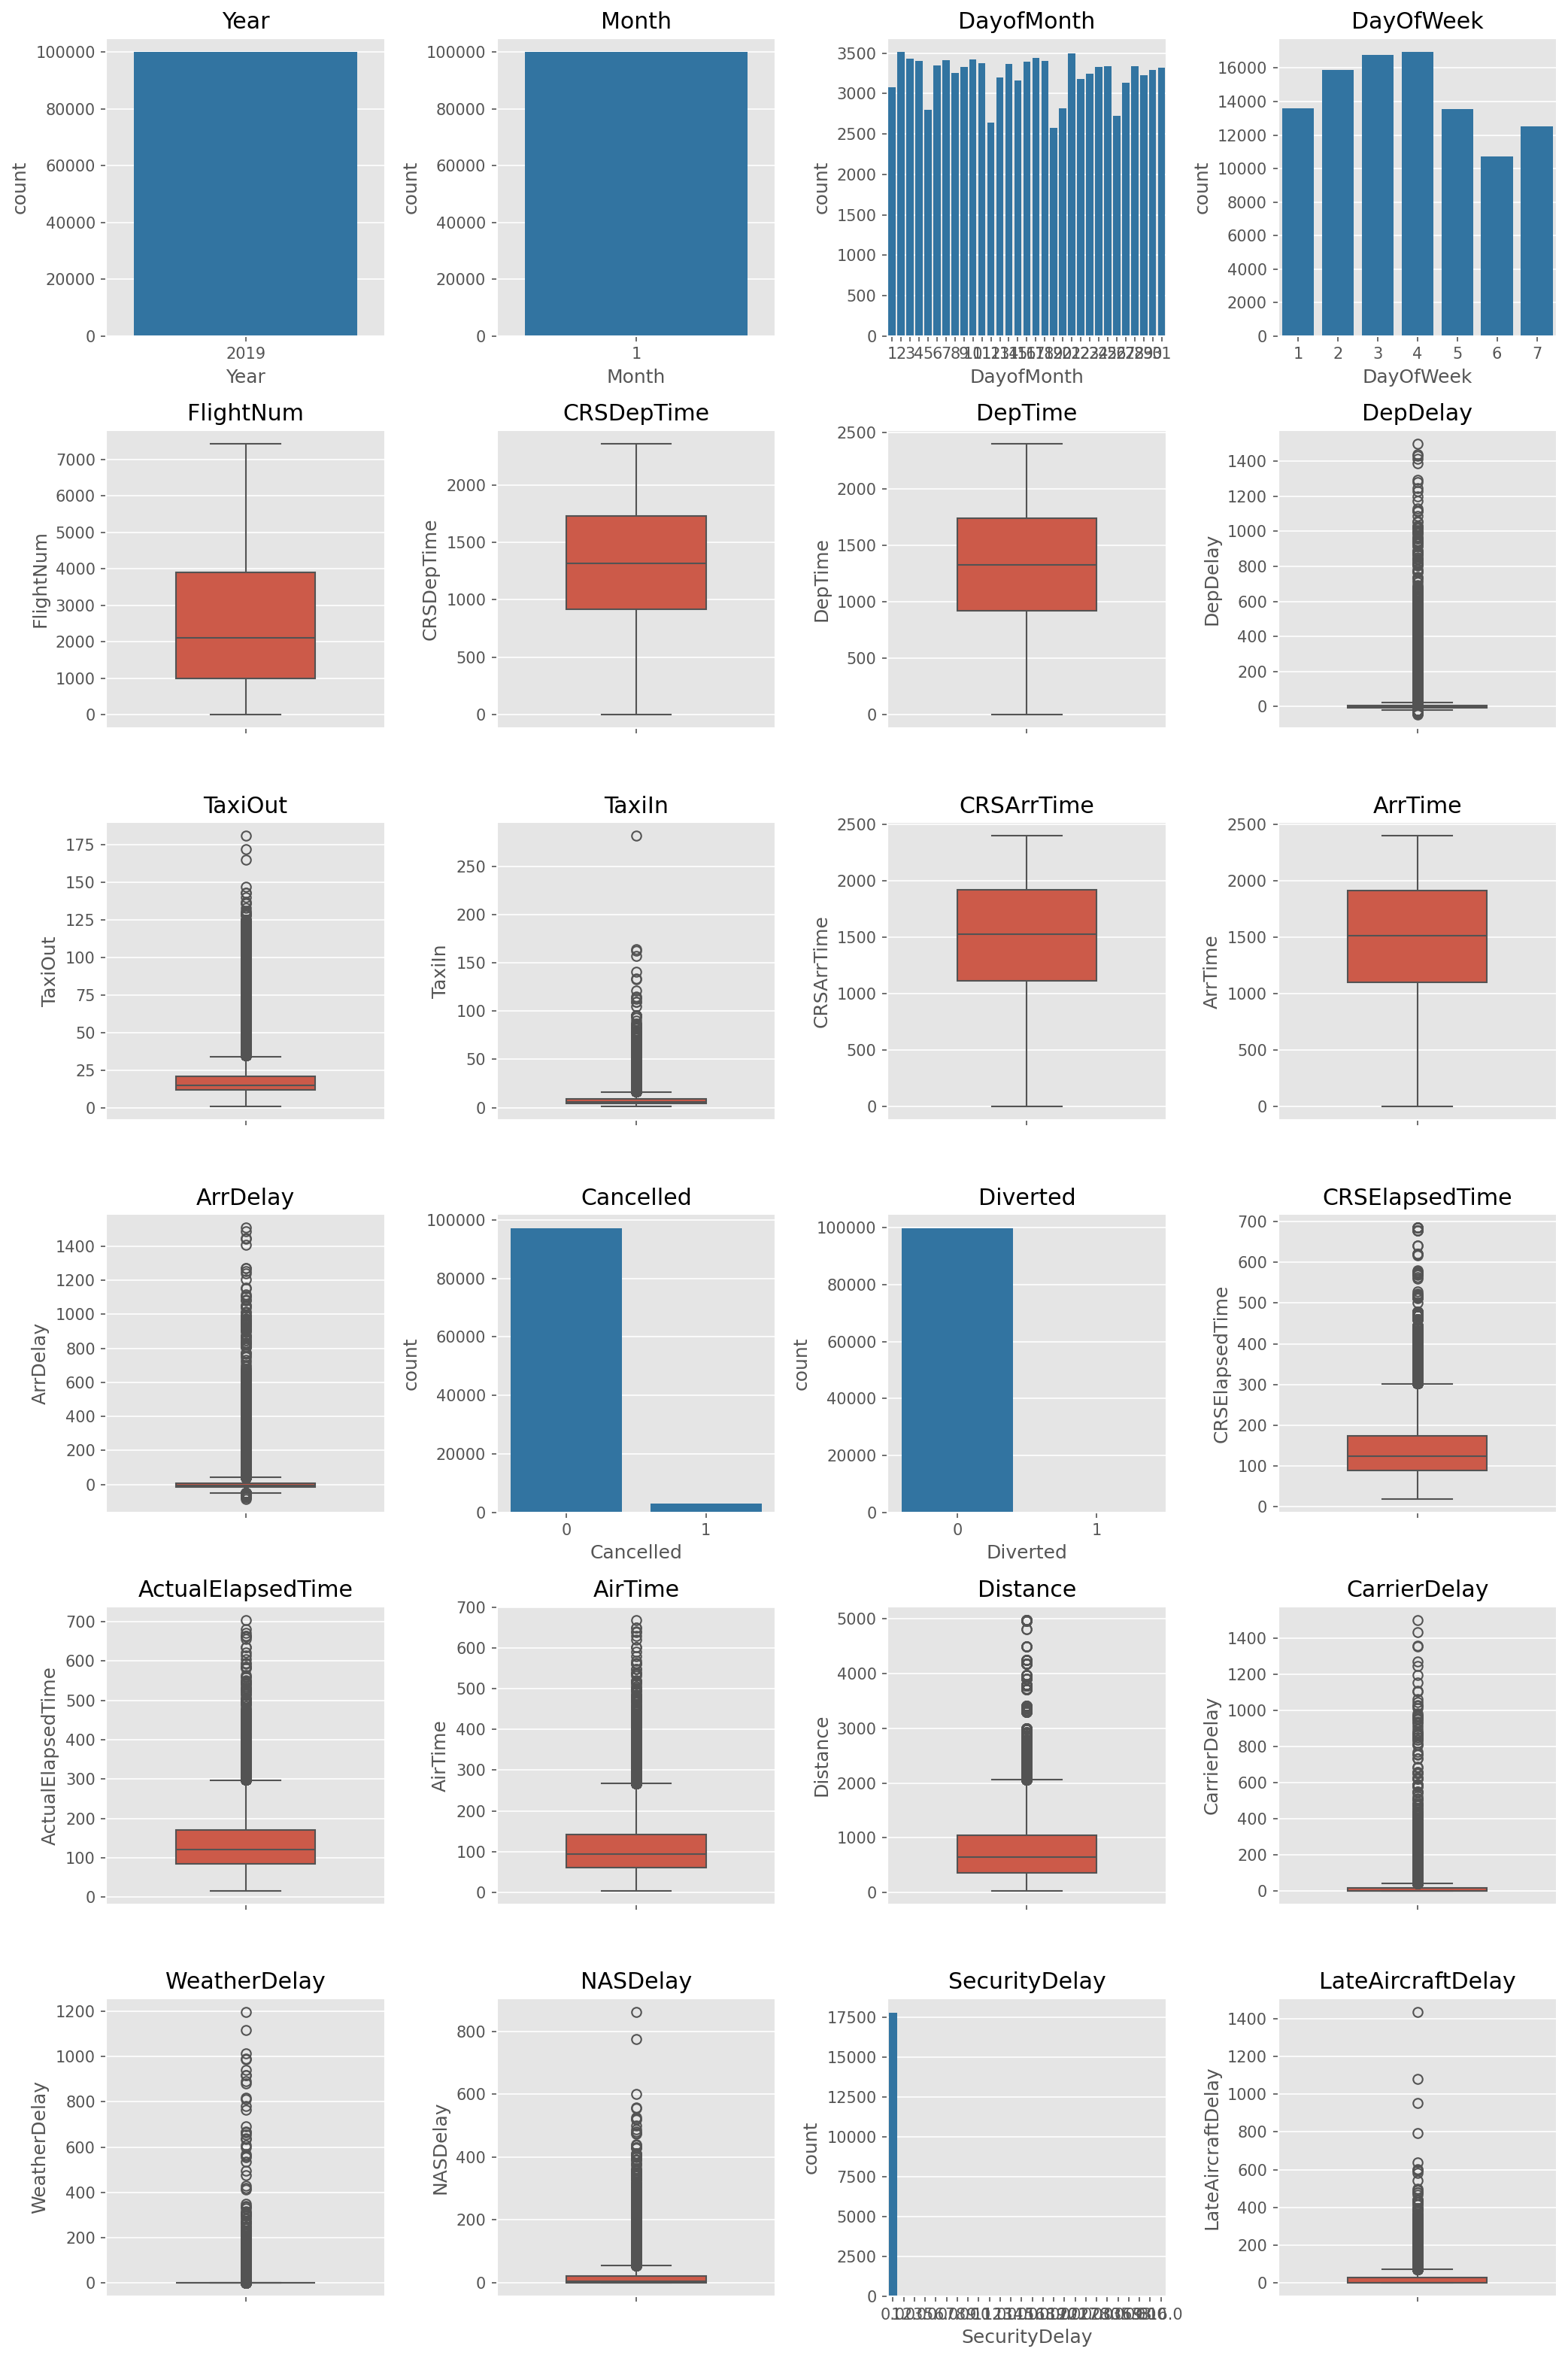

In [40]:
fig,axs = plt.subplots(6,4,figsize=(14,21))



for i,ind in enumerate(jan_info.index):
    # jan data

    if jan_info.loc[ind, 'var_type'] == 'Continuous':
        sns.boxplot(jan,y=ind,ax=axs[i//4, i%4],width=0.5)
        

    else:
        sns.countplot(data=jan,x=ind,color='#1f77b4',ax=axs[i//4, i%4])
    
    axs[i//4, i%4].set_title(ind)

    


fig.tight_layout()

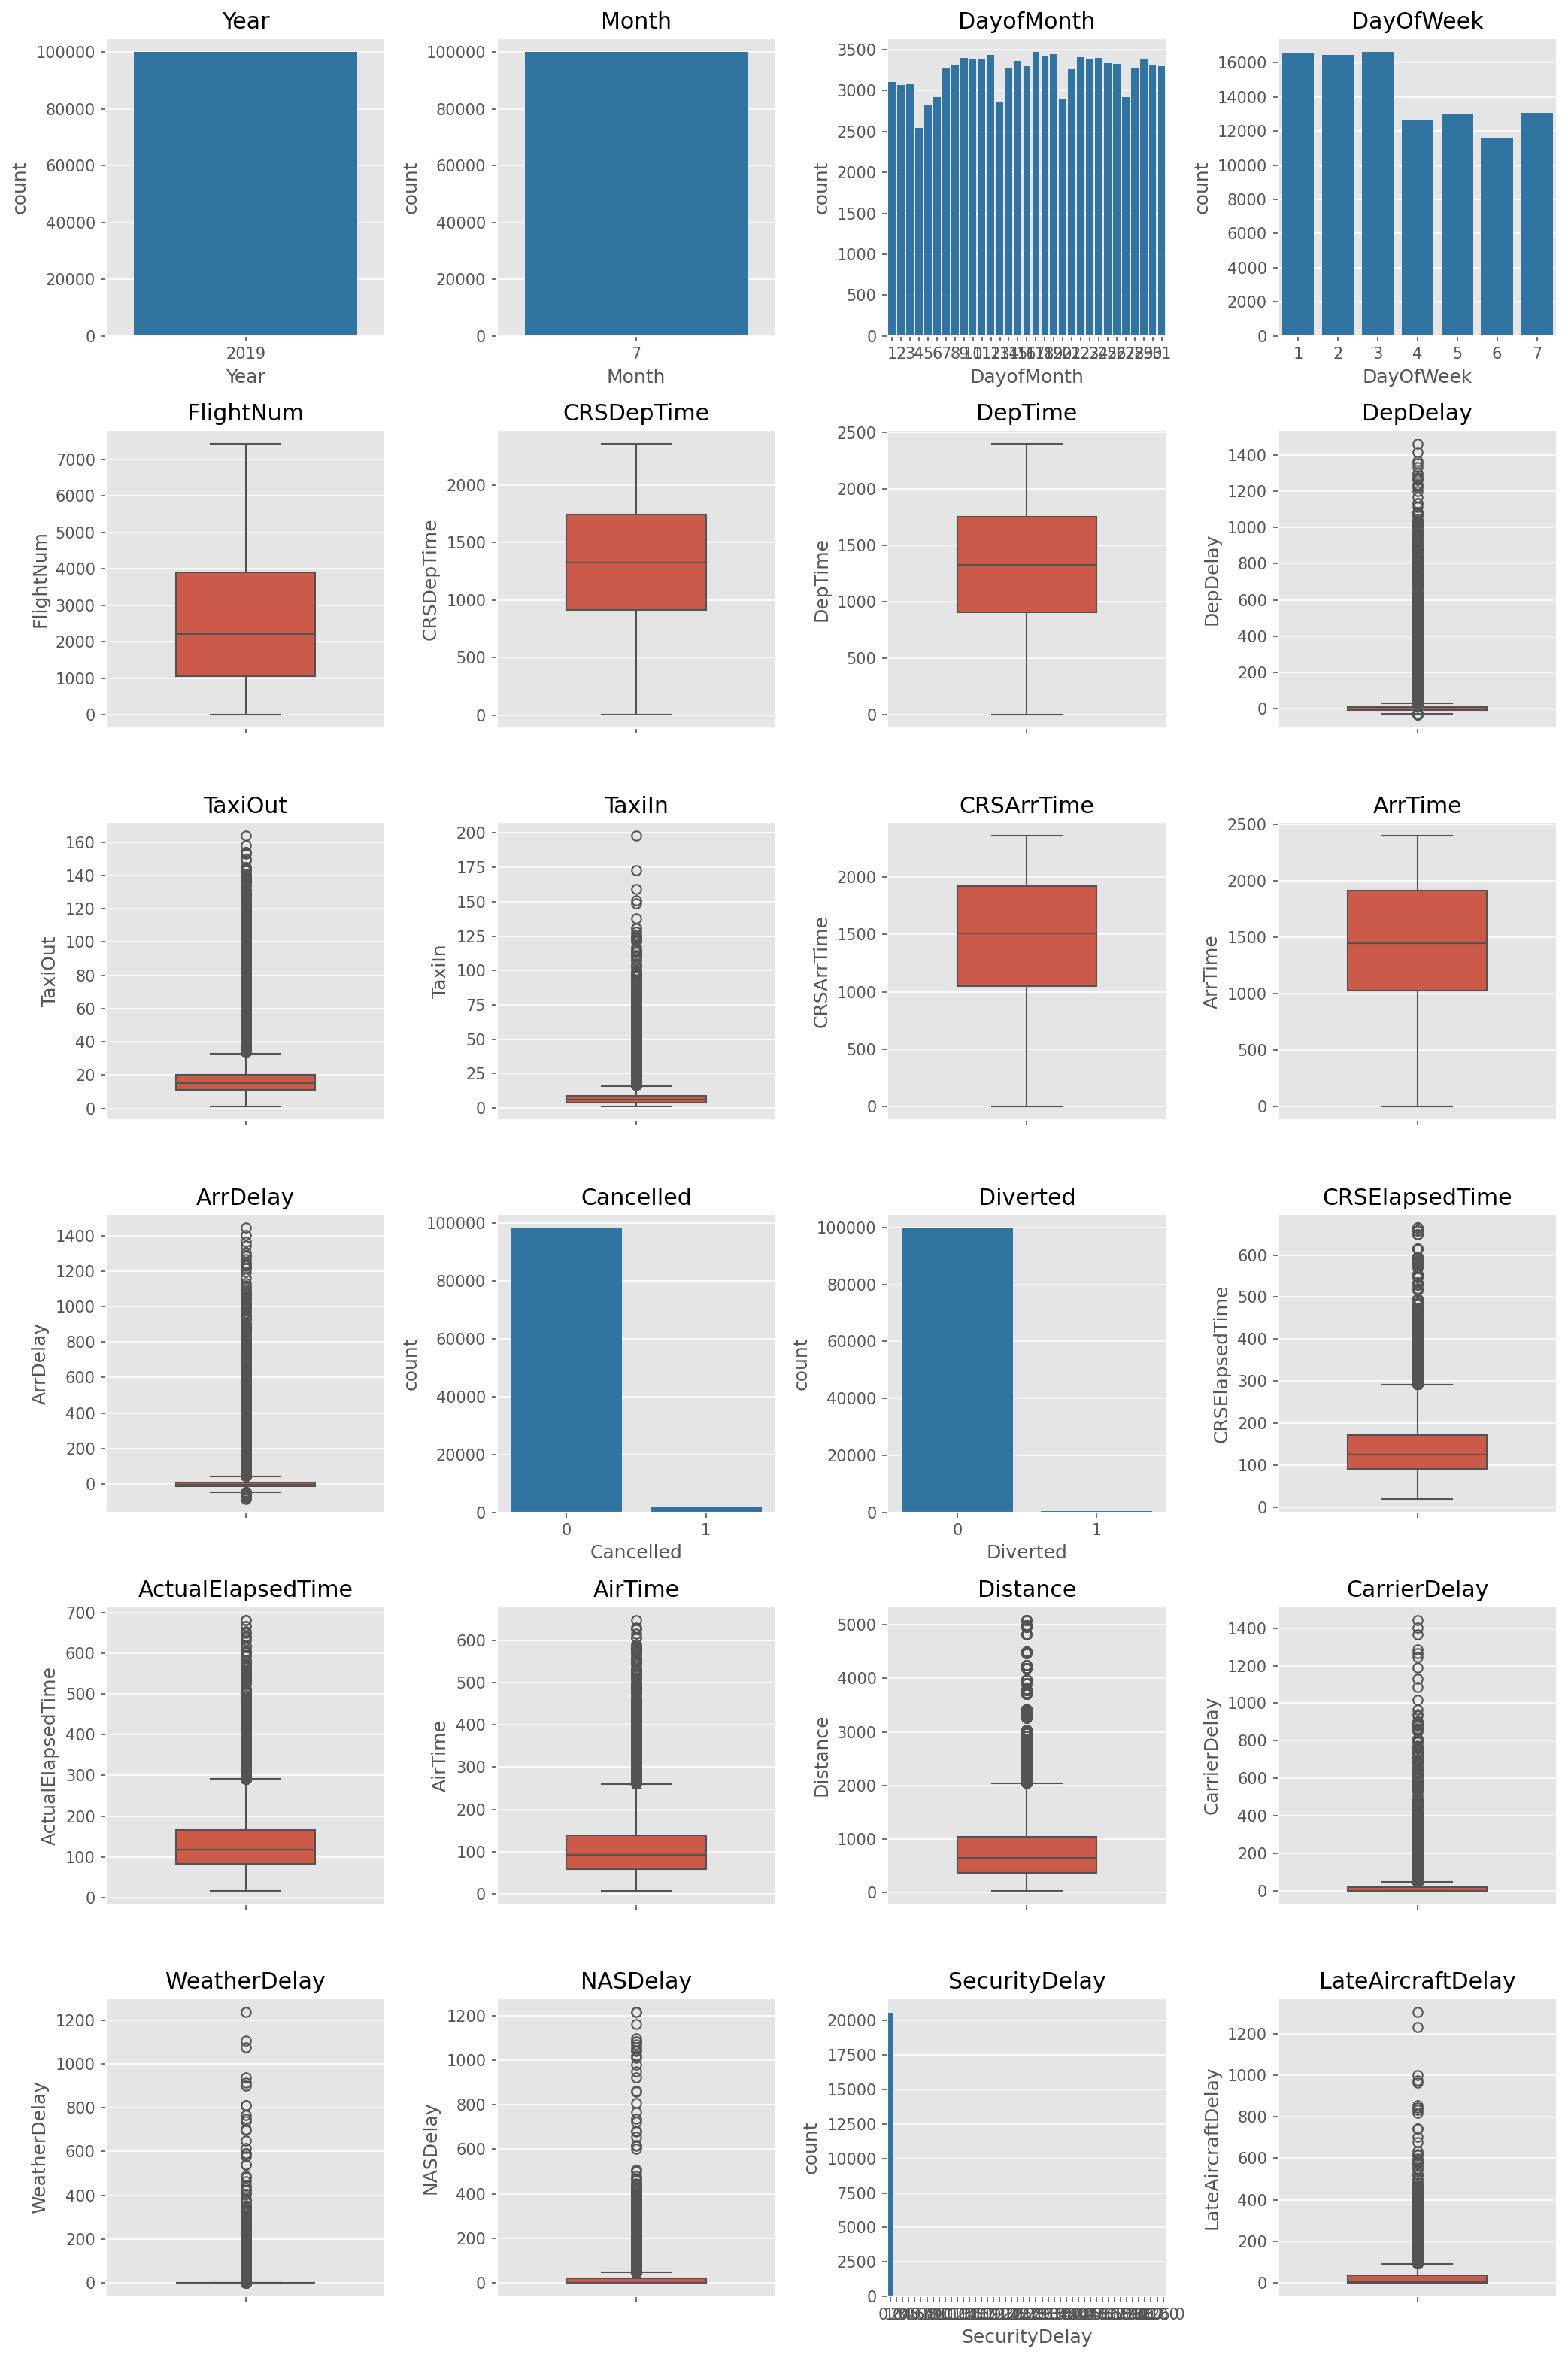

In [41]:
fig,axs = plt.subplots(6,4,figsize=(14,21))



for i,ind in enumerate(jan_info.index):
    # jan data

    if jul_info.loc[ind, 'var_type'] == 'Continuous':
        sns.boxplot(jul,y=ind,ax=axs[i//4, i%4],width=0.5)
        

    else:
        sns.countplot(data=jul,x=ind,color='#1f77b4',ax=axs[i//4, i%4])
    
    axs[i//4, i%4].set_title(ind)

    


fig.tight_layout()

In [ ]:
for 

### Missing values

In [8]:
jan_per_missing = (jan.isnull().sum()/jan.shape[0]).round(2)
jan_per_missing[jan_per_missing > 0]

DepTime              0.03
DepDelay             0.03
TaxiOut              0.03
TaxiIn               0.03
ArrTime              0.03
ArrDelay             0.03
CancellationCode     0.97
ActualElapsedTime    0.03
AirTime              0.03
CarrierDelay         0.82
WeatherDelay         0.82
NASDelay             0.82
SecurityDelay        0.82
LateAircraftDelay    0.82
dtype: float64

In [10]:
jul_per_missing = (jul.isnull().sum()/jul.shape[0]).round(2)
jul_per_missing[jul_per_missing > 0]

DepTime              0.02
DepDelay             0.02
TaxiOut              0.02
TaxiIn               0.02
ArrTime              0.02
ArrDelay             0.02
CancellationCode     0.98
ActualElapsedTime    0.02
AirTime              0.02
CarrierDelay         0.79
WeatherDelay         0.79
NASDelay             0.79
SecurityDelay        0.79
LateAircraftDelay    0.79
dtype: float64

### Total number of flights 

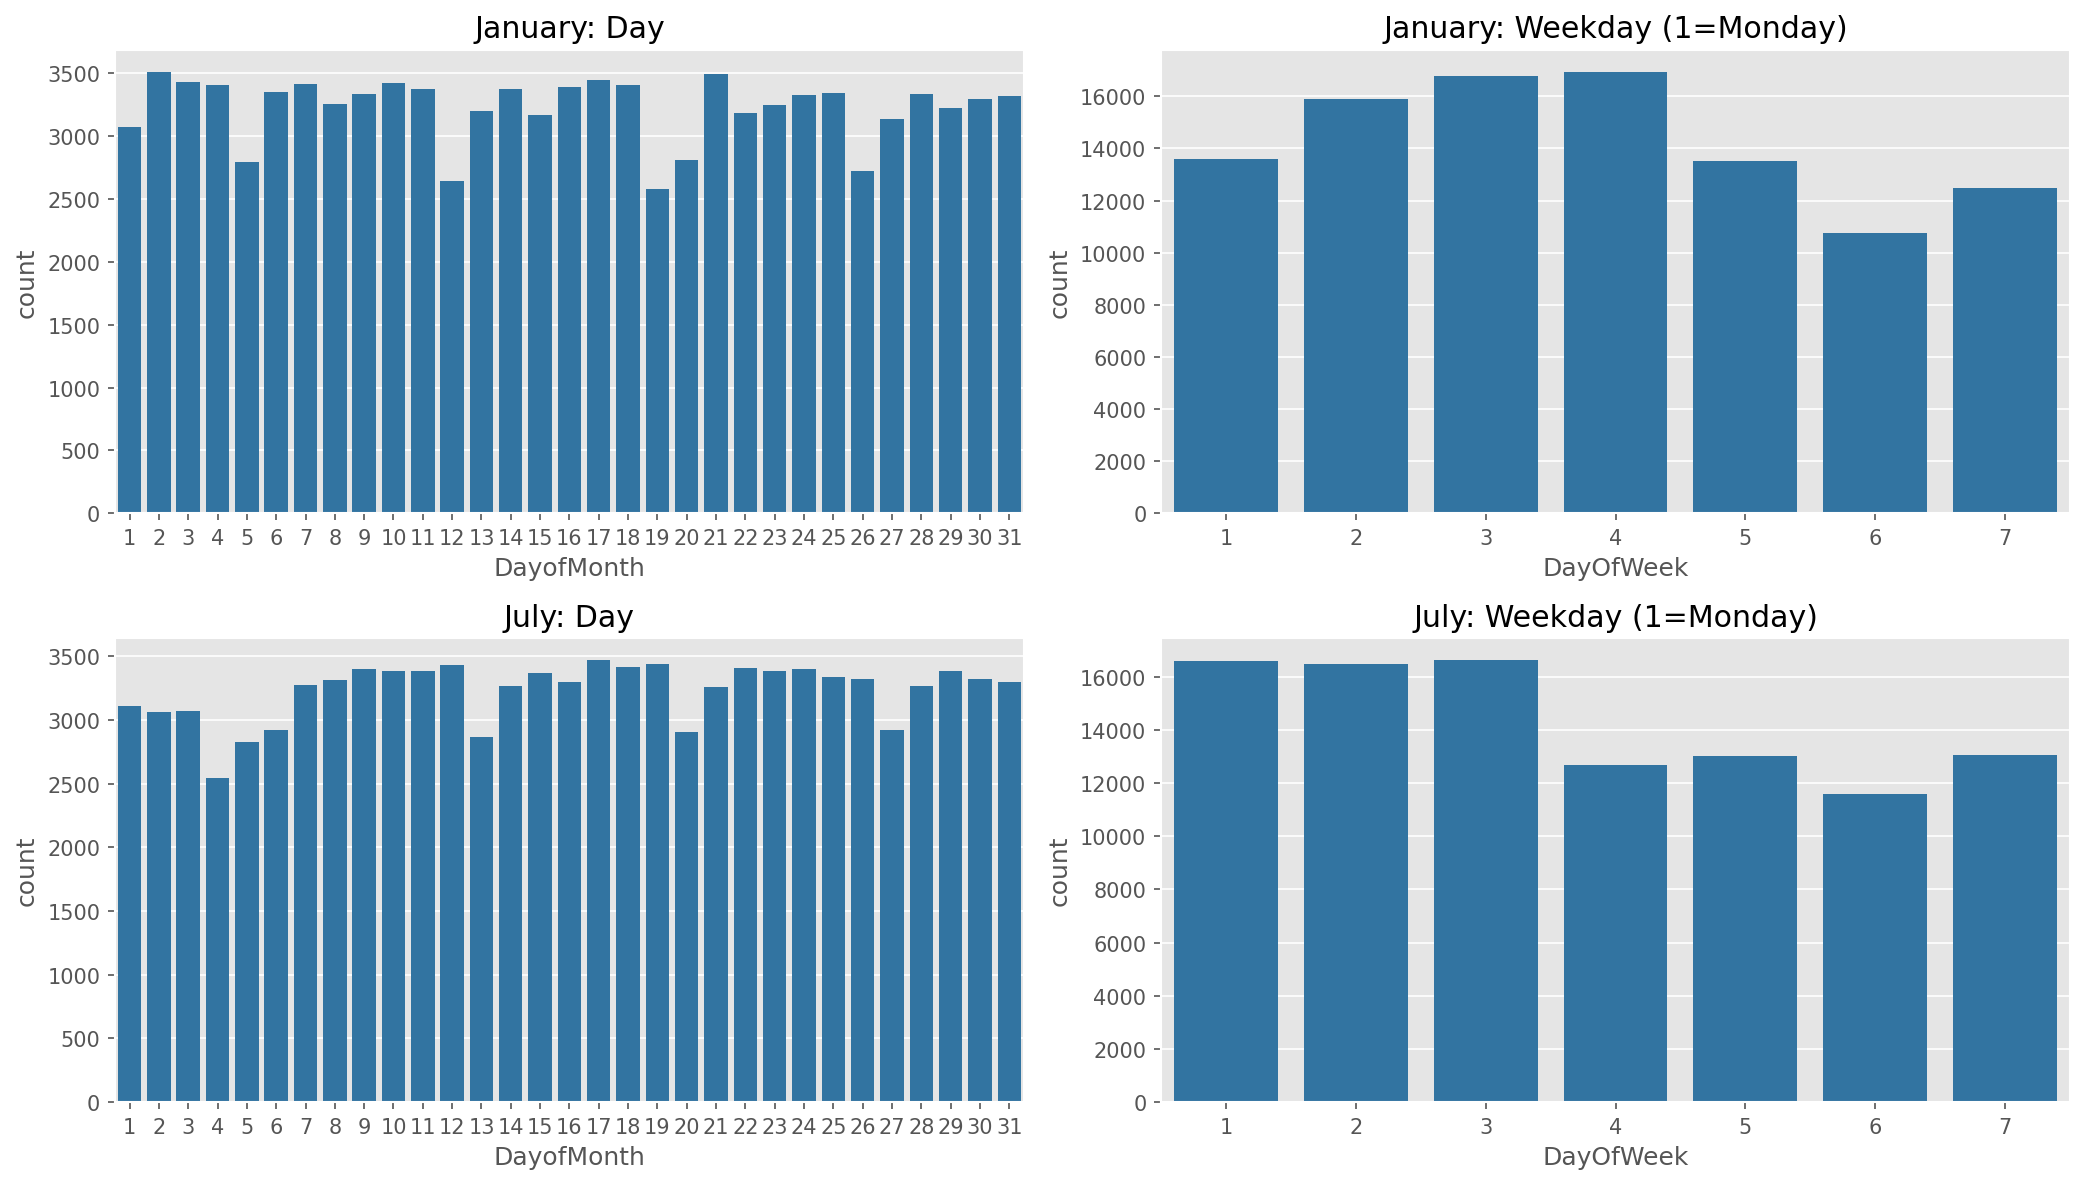

In [11]:
fig,axs = plt.subplots(2,2,figsize=(14,8))

columns = ['DayofMonth','DayOfWeek']

for i,column in enumerate(columns):
    # jan data

    _ = sns.countplot(data=jan,x=column,color='#1f77b4',ax=axs[0,i])
    # Alternatively (without seaborn)
    # _ = jan[column].value_counts().sort_index().plot(kind='bar',ax=axs[0,i])
    
    
    # jul data
    _ = sns.countplot(data=jul,x=column,color='#1f77b4',ax=axs[1,i])

    
_ = axs[0,0].set_title('January: Day')
_ = axs[0,1].set_title('January: Weekday (1=Monday)')

_ = axs[1,0].set_title('July: Day')
_ = axs[1,1].set_title('July: Weekday (1=Monday)')

fig.tight_layout()


### Departure times

The departure time column is `CRSDepTime`. 

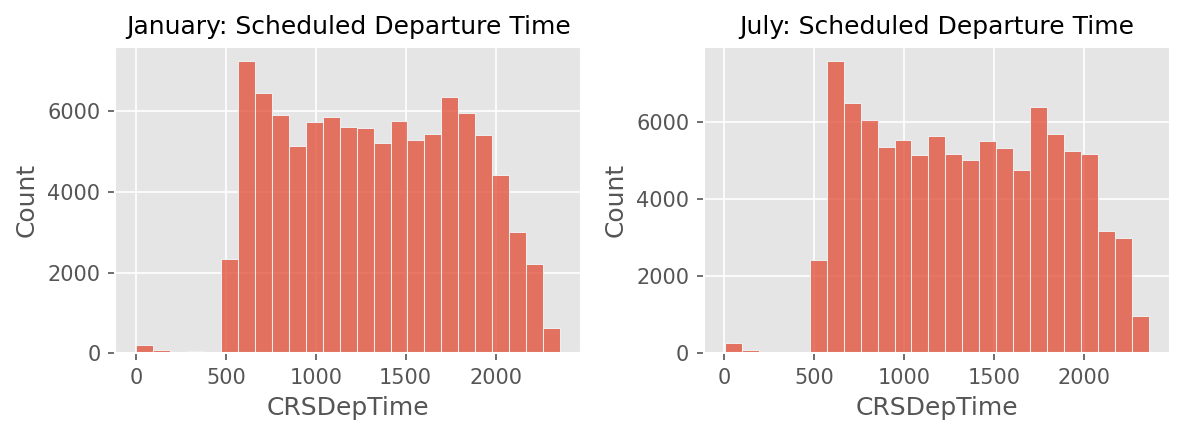

In [12]:
fig,axs = plt.subplots(1,2,figsize=(8,3))


_ = sns.histplot(jan,x='CRSDepTime',ax=axs[0],bins = 25)
_ = sns.histplot(jul,x='CRSDepTime',ax=axs[1],bins =25)

# set titles
_ = axs[0].set_title('January: Scheduled Departure Time',fontsize=12)
_ = axs[1].set_title('July: Scheduled Departure Time',fontsize=12)


fig.tight_layout()

### Arrival and departure delays

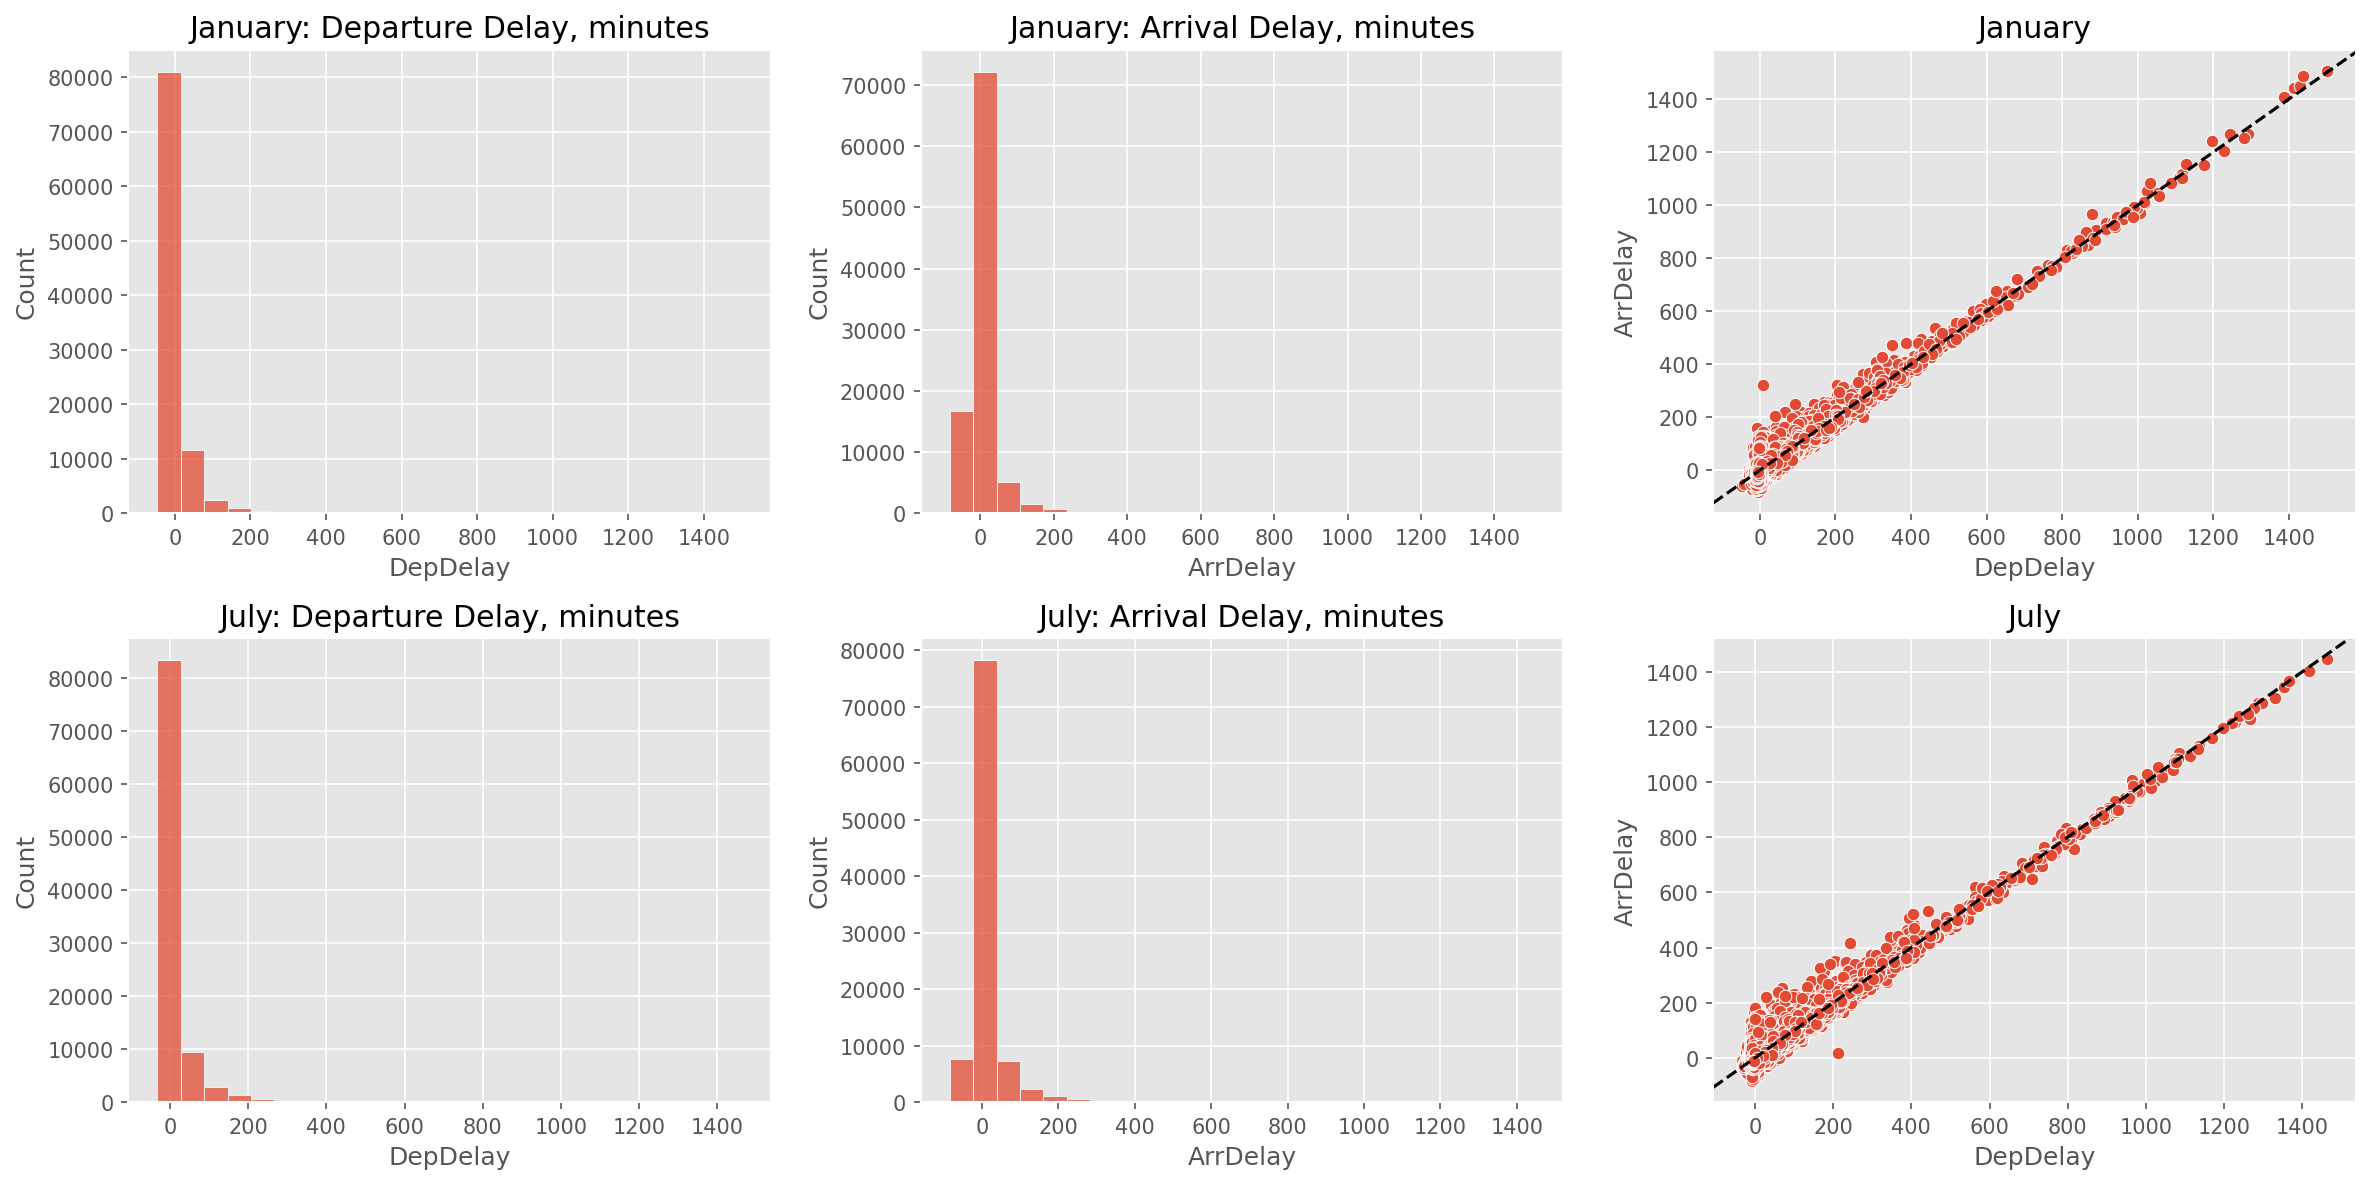

In [14]:
fig,axs = plt.subplots(2,3,figsize=(16,8))

### January data ###
_ = sns.histplot(jan,x='DepDelay',ax=axs[0,0],bins=25)
_ = axs[0,0].set_title('January: Departure Delay, minutes')

_ = sns.histplot(jan,x='ArrDelay',ax=axs[0,1],bins = 25)
_ = axs[0,1].set_title('January: Arrival Delay, minutes')

_ = sns.scatterplot(jan,x='DepDelay',y='ArrDelay',ax=axs[0,2])
_ = axs[0,2].axline((0, 0), slope=1,color='black',linestyle='dashed')
_ = axs[0,2].set_title('January')


### July data ###
_ = sns.histplot(jul,x='DepDelay',ax=axs[1,0],bins = 25)
_ = axs[1,0].set_title('July: Departure Delay, minutes')

_ = sns.histplot(jul,x='ArrDelay',ax=axs[1,1],bins = 25)
_ = axs[1,1].set_title('July: Arrival Delay, minutes')

_ = sns.scatterplot(jul,x='DepDelay',y='ArrDelay',ax=axs[1,2])
_ = axs[1,2].axline((0, 0), slope=1,color='black',linestyle='dashed')
_ = axs[1,2].set_title('July')


fig.tight_layout()

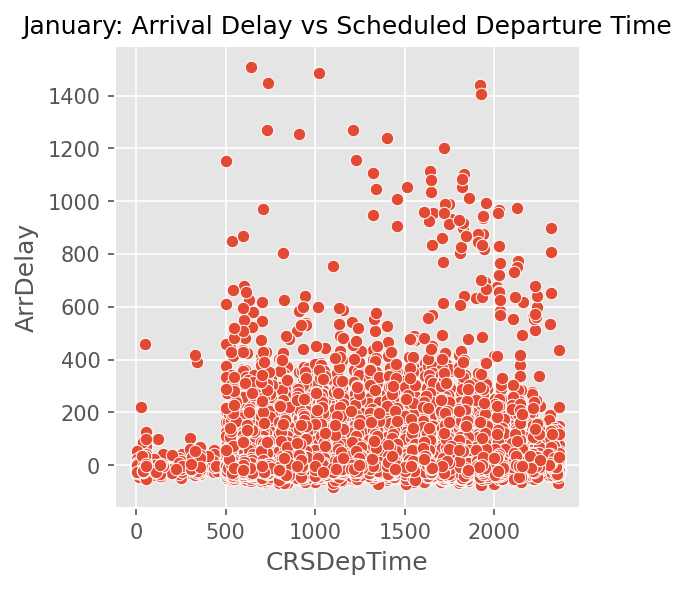

In [15]:
# plot of arrival delay vs departure time
fig,ax = plt.subplots(1,1,figsize=(4,4))

_ = sns.scatterplot(jan,x='CRSDepTime',y='ArrDelay',ax=ax)
_ = ax.set_title('January: Arrival Delay vs Scheduled Departure Time',fontsize=12)

### Distance and airtimes

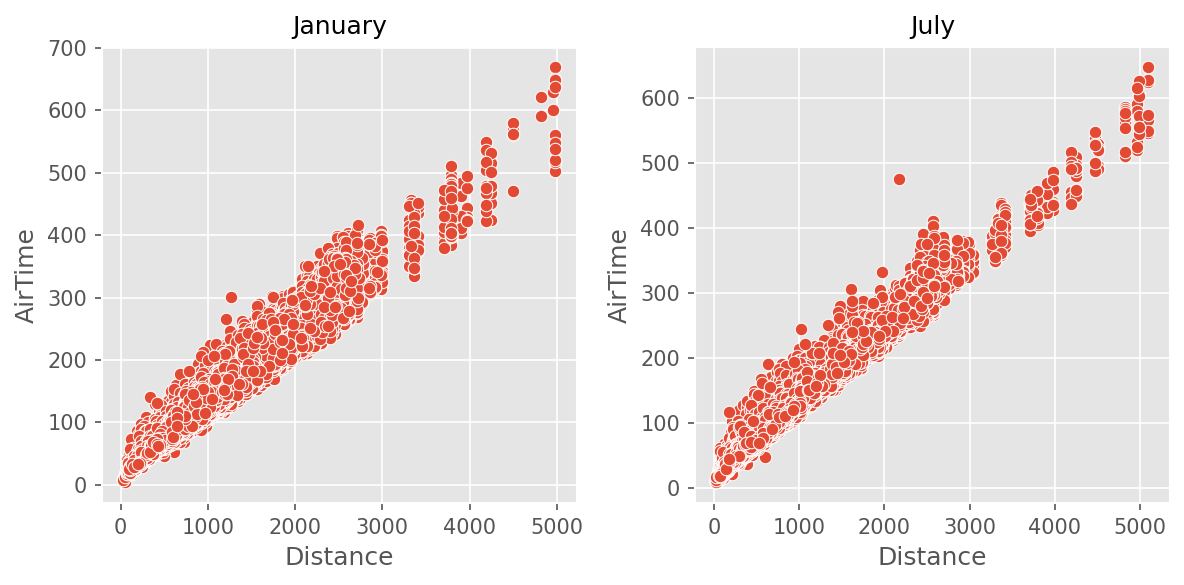

In [16]:
fig,axs = plt.subplots(1,2,figsize=(8,4))

_ = sns.scatterplot(jan,x='Distance',y='AirTime',ax=axs[0])
_ = axs[0].set_title('January',fontsize=12)

_ = sns.scatterplot(jul,x='Distance',y='AirTime',ax=axs[1])
_ = axs[1].set_title('July',fontsize=12)

fig.tight_layout()

In [17]:
# filter airtimes > 500
jan.query('AirTime > 500')

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,FlightNum,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
558585,2019,1,26,6,UA,N76064,363,EWR,HNL,830,...,0,679.0,635.0,601.0,4962,NaN,NaN,NaN,NaN,NaN
566500,2019,1,7,1,UA,N781UA,202,ORD,OGG,1010,...,0,572.0,595.0,549.0,4184,17.0,0.0,23.0,0.0,0.0
578522,2019,1,16,3,HA,N388HA,51,JFK,HNL,1000,...,0,685.0,705.0,669.0,4983,25.0,0.0,0.0,0.0,0.0
578514,2019,1,8,2,HA,N391HA,51,JFK,HNL,1000,...,0,685.0,664.0,640.0,4983,NaN,NaN,NaN,NaN,NaN
568200,2019,1,6,7,UA,N214UA,202,ORD,OGG,1010,...,0,571.0,586.0,536.0,4184,0.0,0.0,20.0,0.0,0.0
560098,2019,1,25,5,UA,N67058,363,EWR,HNL,830,...,0,679.0,664.0,601.0,4962,NaN,NaN,NaN,NaN,NaN
578492,2019,1,17,4,HA,N381HA,50,HNL,JFK,1620,...,0,575.0,550.0,516.0,4983,NaN,NaN,NaN,NaN,NaN
419520,2019,1,4,5,DL,N822NW,837,ATL,HNL,1100,...,0,618.0,593.0,568.0,4502,NaN,NaN,NaN,NaN,NaN
538144,2019,1,4,5,UA,N772UA,219,ORD,HNL,1000,...,0,570.0,547.0,515.0,4243,NaN,NaN,NaN,NaN,NaN
541420,2019,1,2,3,UA,N672UA,345,IAD,HNL,840,...,0,641.0,615.0,591.0,4817,NaN,NaN,NaN,NaN,NaN


In [18]:
# filter airtimes > 500 for July Data
jul.query('AirTime > 500')

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,TailNum,FlightNum,Origin,Dest,CRSDepTime,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
111471,2019,7,29,1,UA,N672UA,345,IAD,HNL,850,...,0,616.0,614.0,586.0,4817,NaN,NaN,NaN,NaN,NaN
146625,2019,7,3,3,UA,N215UA,219,ORD,HNL,1010,...,0,554.0,540.0,509.0,4243,23.0,0.0,0.0,0.0,0.0
126041,2019,7,6,6,UA,N67058,362,HNL,EWR,1520,...,0,570.0,557.0,532.0,4962,NaN,NaN,NaN,NaN,NaN
225046,2019,7,28,7,DL,N836MH,599,DTW,HNL,1215,...,0,595.0,560.0,539.0,4475,NaN,NaN,NaN,NaN,NaN
187552,2019,7,5,5,DL,N843MH,599,DTW,HNL,1215,...,0,595.0,574.0,548.0,4475,NaN,NaN,NaN,NaN,NaN
239173,2019,7,12,5,DL,N835MH,837,ATL,HNL,1035,...,0,581.0,544.0,525.0,4502,NaN,NaN,NaN,NaN,NaN
211056,2019,7,8,1,DL,N842MH,837,ATL,HNL,1035,...,0,581.0,557.0,529.0,4502,NaN,NaN,NaN,NaN,NaN
124430,2019,7,7,7,UA,N77066,363,EWR,HNL,845,...,0,658.0,638.0,591.0,4962,NaN,NaN,NaN,NaN,NaN
46271,2019,7,8,1,HA,N396HA,50,HNL,JFK,1510,...,0,585.0,595.0,569.0,4983,18.0,0.0,0.0,0.0,0.0
46675,2019,7,17,3,HA,N384HA,90,HNL,BOS,1400,...,0,590.0,570.0,546.0,5095,NaN,NaN,NaN,NaN,NaN


## Feature engineering

In [19]:
# creating a categorical column for weekday
jan['weekday'] = (
    jan['DayOfWeek']
    .replace({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'})
    .astype('category')
)

jul['weekday'] = (
    jul['DayOfWeek']
    .replace({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'})
    .astype('category')
)

### Delay features

In [20]:
jan['ArrDelay'].describe()

count    96908.000000
mean         4.144003
std         50.792643
min        -83.000000
25%        -16.000000
50%         -7.000000
75%          7.000000
max       1508.000000
Name: ArrDelay, dtype: float64

In [21]:
# first use a max(0,x) transform to get rid of negative values (?)
# then create a new column using the log(1+x)

for column in ['ArrDelay','DepDelay']:
    jan[column] = np.maximum(0,jan[column])
    jan['log'+column] = np.log(1+jan[column])
    
    jul[column] = np.maximum(0,jul[column])
    jul['log'+column] = np.log(1+jul[column])

In [22]:
jan['logArrDelay'].describe()

count    96908.000000
mean         0.990544
std          1.560867
min          0.000000
25%          0.000000
50%          0.000000
75%          2.079442
max          7.319202
Name: logArrDelay, dtype: float64

### Departure times

In [23]:
jan['DecimalDepTime'] = np.floor(jan['CRSDepTime'] / 100) + (jan['CRSDepTime'] % 100) / 60
jan[['CRSDepTime','DecimalDepTime']].head(5)

,CRSDepTime,DecimalDepTime
380728,1758,17.966667
544669,1735,17.583333
211691,1025,10.416667
501386,1603,16.050000
443541,1213,12.216667


In [24]:
jul['DecimalDepTime'] = np.floor(jul['CRSDepTime'] / 100) + (jul['CRSDepTime'] % 100) / 60
jul[['CRSDepTime','DecimalDepTime']].head(5)

,CRSDepTime,DecimalDepTime
469490,1415,14.250000
616791,2038,20.633333
568679,1423,14.383333
217635,1855,18.916667
165363,1656,16.933333


### Average speed (new feature)

In [25]:
jan['speed'] = jan['Distance']/(jan['AirTime']/60)
jul['speed'] = jul['Distance']/(jul['AirTime']/60)

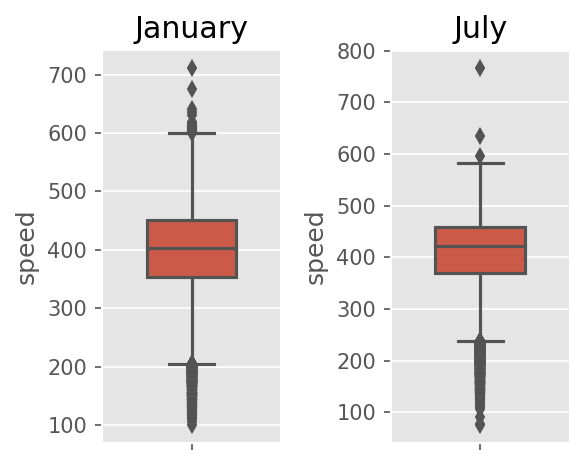

In [26]:
# boxplots of average speeds

fig,axs = plt.subplots(1,2,figsize=(4,3.2))

_ = sns.boxplot(jan,y='speed',ax=axs[0],width=0.5)
_ = axs[0].set_title('January')

_ = sns.boxplot(jul,y='speed',ax=axs[1],width=0.5)
_ = axs[1].set_title('July')
fig.tight_layout()

Filter speeds greater than 650 mph.

In [27]:
jan_low_speed = jan[jan['speed'] <= 650]
# alternatively
# jan_low_speed = jan.query("speed <= 650")

## Further EDA after feature engineering

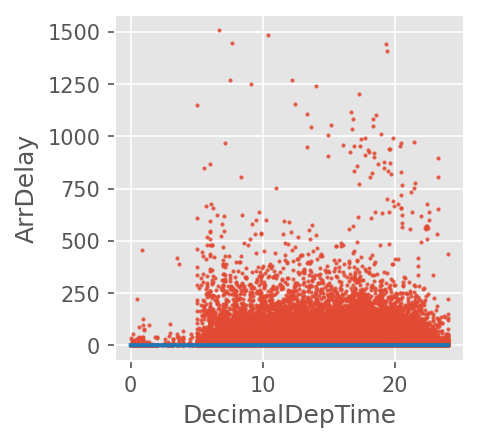

In [28]:
# plot of arrival delay vs departure time
fig,ax = plt.subplots(1,1,figsize=(3,3))

# regplot doesn't exactly replicate geom_smooth, which ends up using GAM models for the
# smoothing function. Here I use lowess (loess) = True, which requires statsmodels
_ = sns.regplot(
    jan,x='DecimalDepTime',y='ArrDelay',ax=ax,lowess=True,
    scatter_kws={"s" : 1,"alpha":0.8}, line_kws={"lw" : 2, 'color' : '#1f77b4'}
)

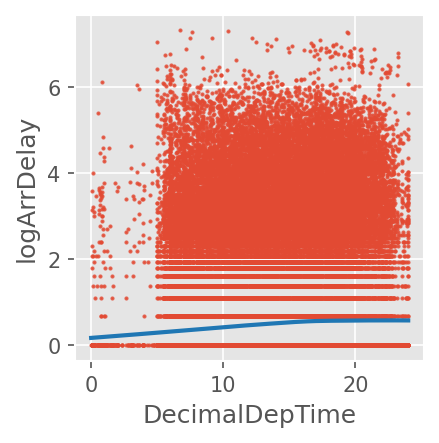

In [29]:
fig,ax = plt.subplots(1,1,figsize=(3,3))
_ = sns.regplot(
    jan,x='DecimalDepTime',y='logArrDelay',ax=ax,lowess=True,
    scatter_kws={"s" : 1,"alpha":0.8}, line_kws={"lw" : 2, 'color' : '#1f77b4'}
)

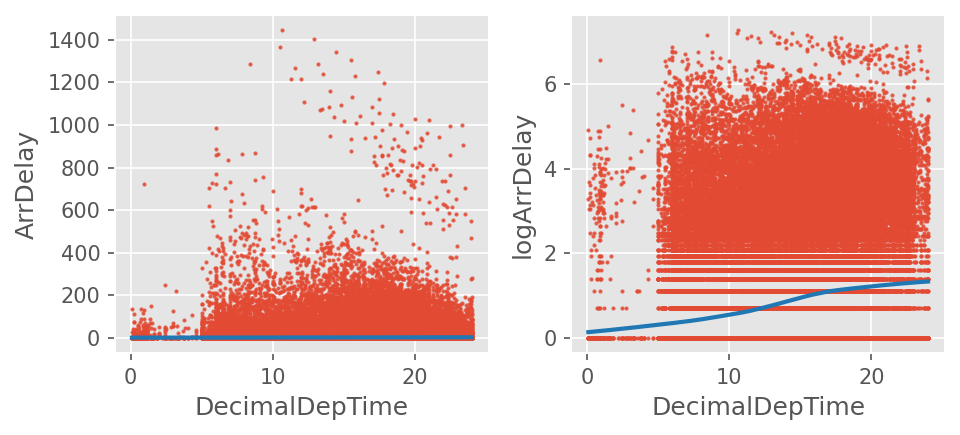

In [30]:
# repeating the same analysis for the July data
fig,axs = plt.subplots(1,2,figsize=(6.5,3))

for i,column in enumerate(['ArrDelay','logArrDelay']):
    _ = sns.regplot(
        jul,x='DecimalDepTime',y=column,ax=axs[i],lowess=True,
        scatter_kws={"s" : 1,"alpha":0.8}, line_kws={"lw" : 2, 'color' : '#1f77b4'}
    )

fig.tight_layout()

## Explore city pairs: flights from ORD to SFO and LGA

SFO: San Fransisco
LGA: LaGuardia

In [31]:
query_sfo = "Origin == 'ORD' & Dest=='SFO'"
query_lga = "Origin == 'ORD' & Dest=='LGA'"


jan_sfo = jan.query(query_sfo)
jan_lga = jan.query(query_lga)

jul_sfo = jul.query(query_sfo)
jul_lga = jul.query(query_lga)


### Alternate syntax ###
# jan_sfo = jan[(jan['Origin'] == 'ORD') & (jan['Dest'] == 'SFO')]
# jan_lga = jan[(jan['Origin'] == 'ORD') & (jan['Dest'] == 'LGA')]
# jul_sfo = jul[(jul['Origin'] == 'ORD') & (jul['Dest'] == 'SFO')]
# jul_lga = jul[(jul['Origin'] == 'ORD') & (jul['Dest'] == 'LGA')]

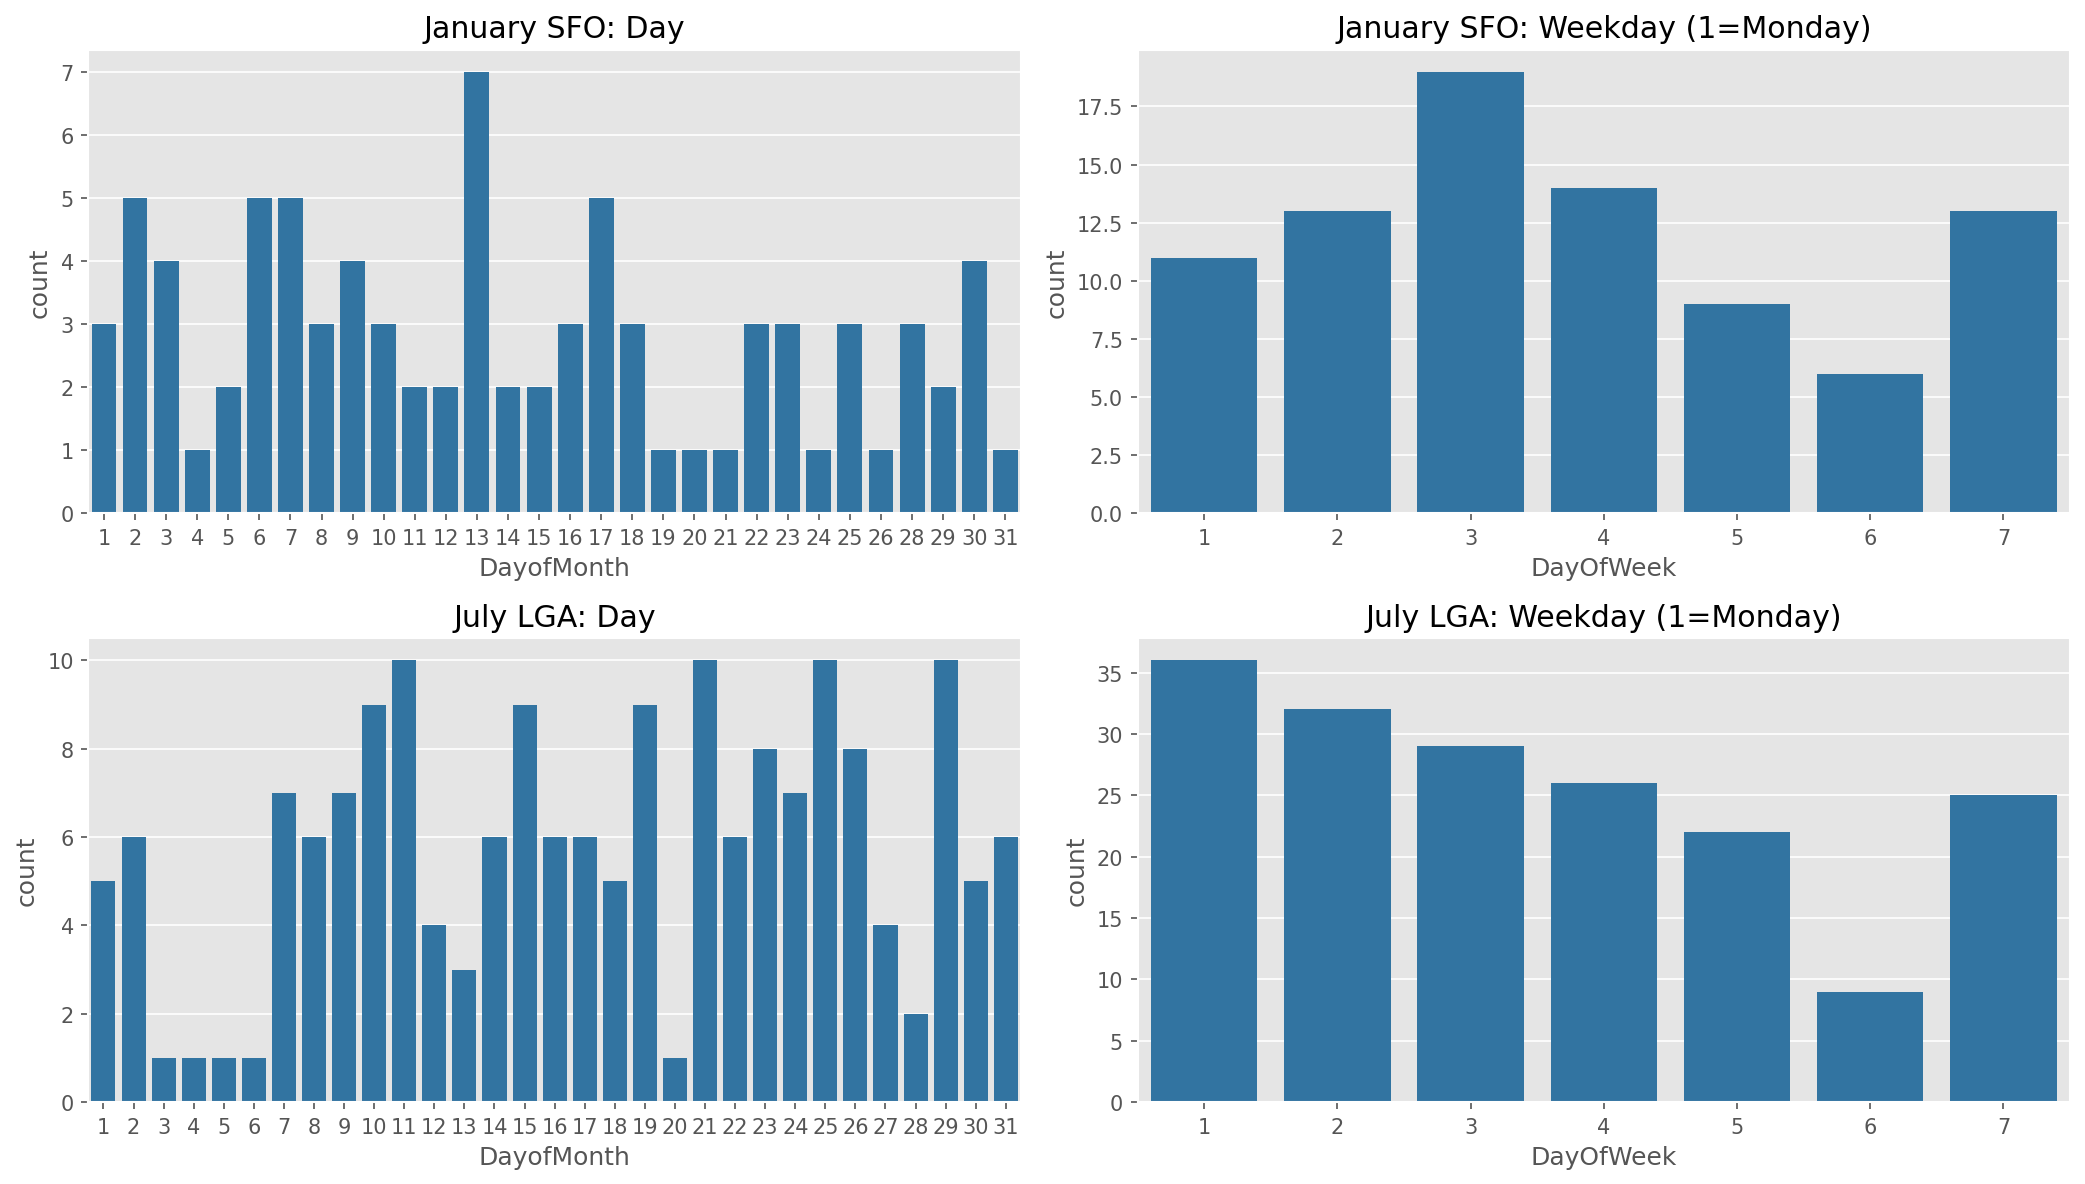

In [32]:
# Total number of flights
fig,axs = plt.subplots(2,2,figsize=(14,8))

columns = ['DayofMonth','DayOfWeek']

for i,column in enumerate(columns):
    # jan_SFO data
    _ = sns.countplot(data=jan_sfo,x=column,color='#1f77b4',ax=axs[0,i])
    
    
    # jul_LGA data
    _ = sns.countplot(data=jul_lga,x=column,color='#1f77b4',ax=axs[1,i])

    
_ = axs[0,0].set_title('January SFO: Day')
_ = axs[0,1].set_title('January SFO: Weekday (1=Monday)')

_ = axs[1,0].set_title('July LGA: Day')
_ = axs[1,1].set_title('July LGA: Weekday (1=Monday)')

fig.tight_layout()

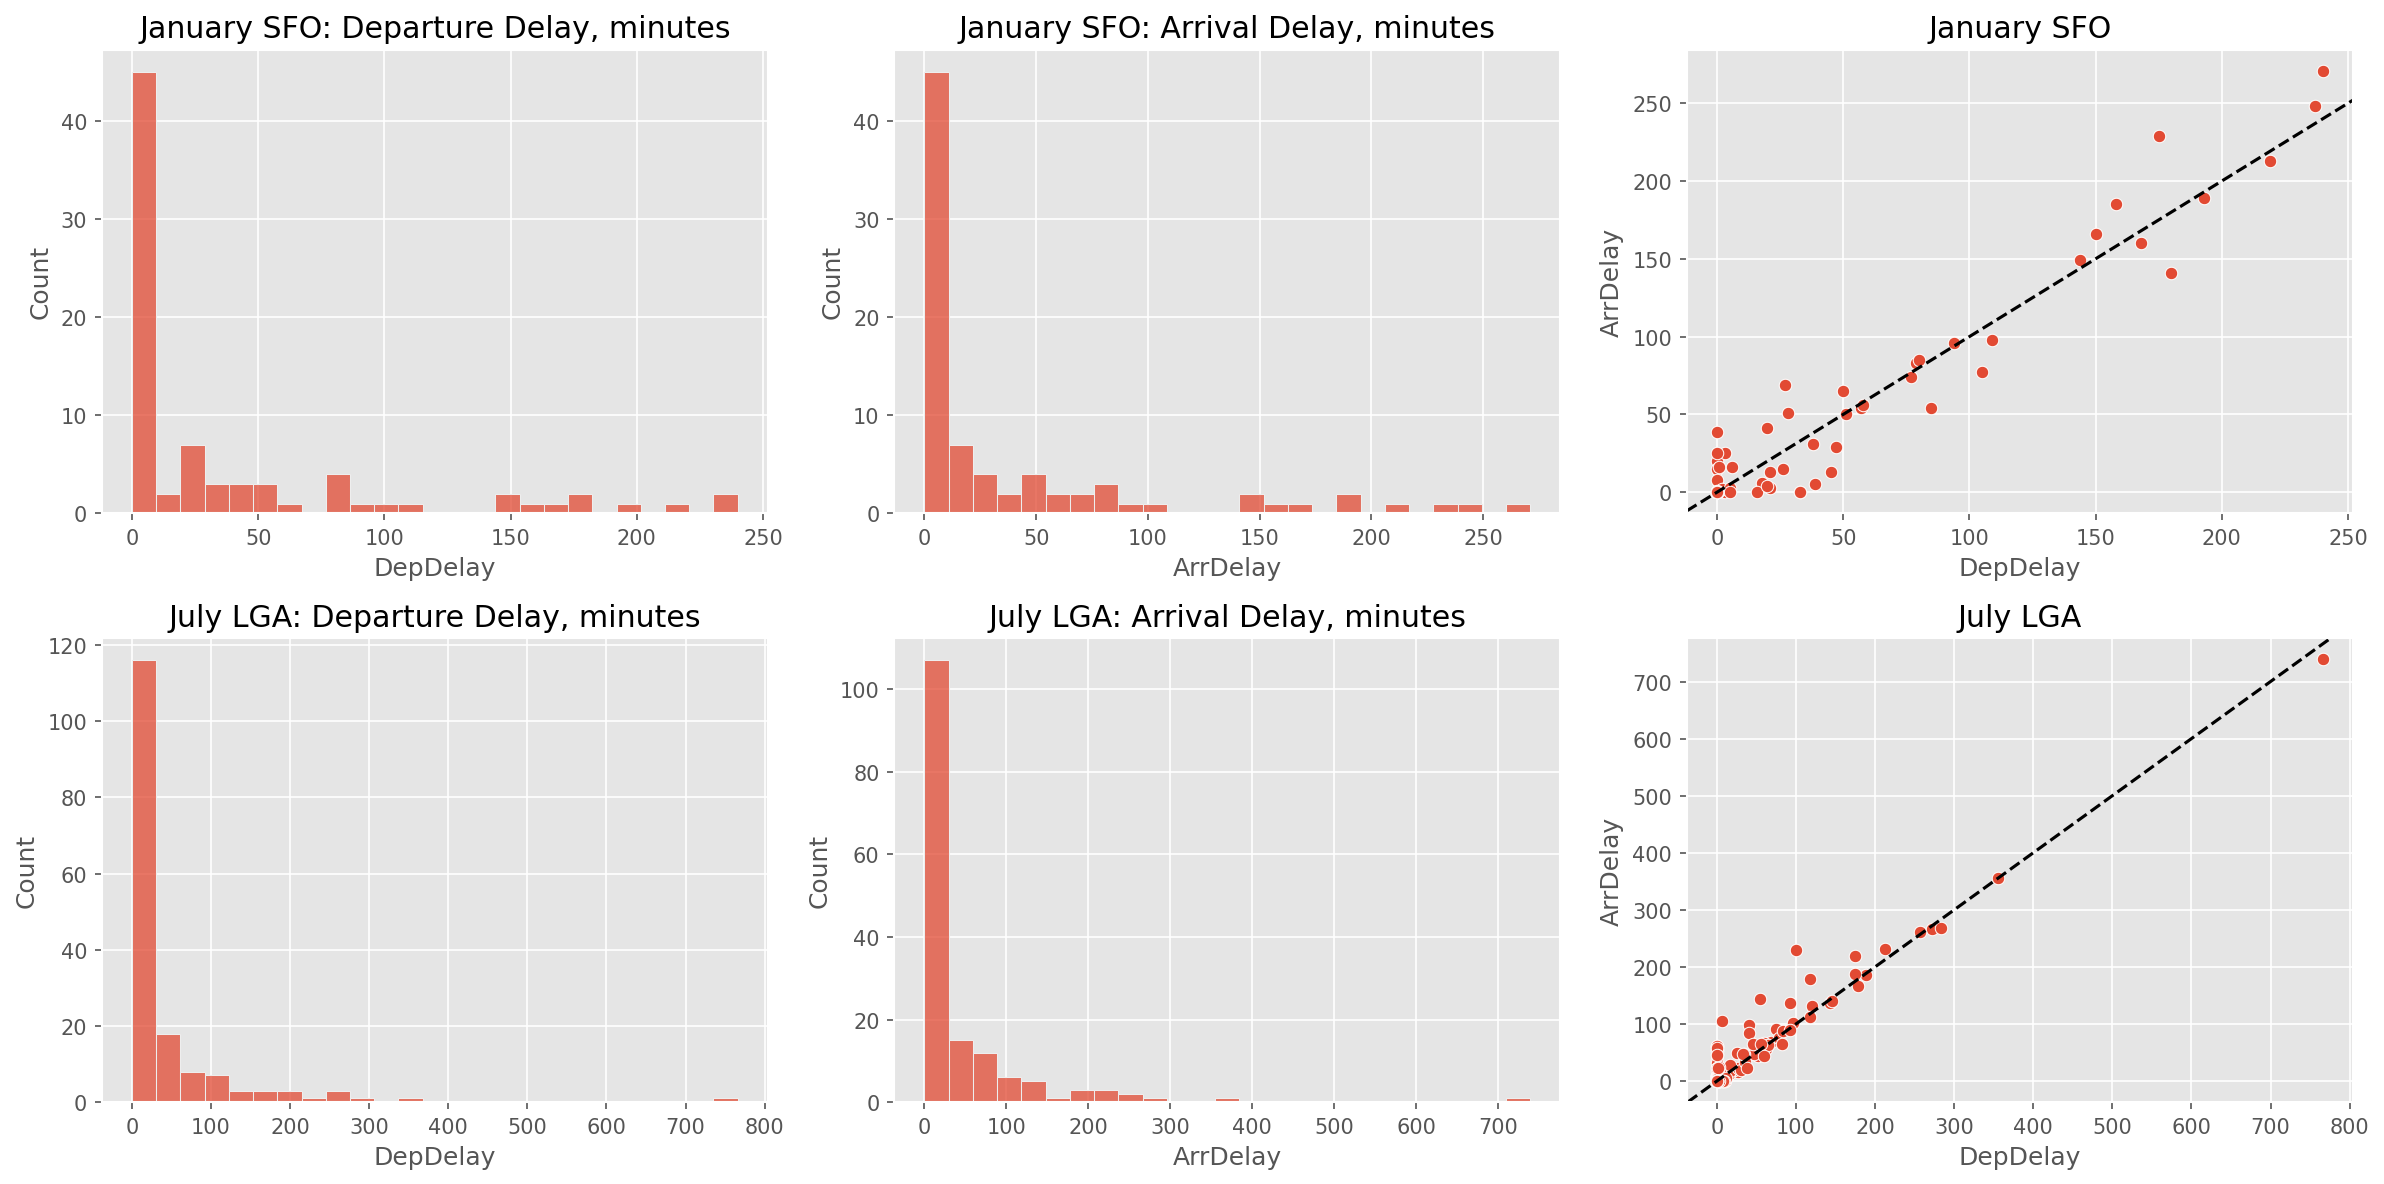

In [33]:
fig,axs = plt.subplots(2,3,figsize=(16,8))

### January data ###
_ = sns.histplot(jan_sfo,x='DepDelay',ax=axs[0,0],bins=25)
_ = axs[0,0].set_title('January SFO: Departure Delay, minutes')

_ = sns.histplot(jan_sfo,x='ArrDelay',ax=axs[0,1],bins = 25)
_ = axs[0,1].set_title('January SFO: Arrival Delay, minutes')

_ = sns.scatterplot(jan_sfo,x='DepDelay',y='ArrDelay',ax=axs[0,2])
_ = axs[0,2].axline((0, 0), slope=1,color='black',linestyle='dashed')
_ = axs[0,2].set_title('January SFO')


### July data ###
_ = sns.histplot(jul_lga,x='DepDelay',ax=axs[1,0],bins = 25)
_ = axs[1,0].set_title('July LGA: Departure Delay, minutes')

_ = sns.histplot(jul_lga,x='ArrDelay',ax=axs[1,1],bins = 25)
_ = axs[1,1].set_title('July LGA: Arrival Delay, minutes')

_ = sns.scatterplot(jul_lga,x='DepDelay',y='ArrDelay',ax=axs[1,2])
_ = axs[1,2].axline((0, 0), slope=1,color='black',linestyle='dashed')
_ = axs[1,2].set_title('July LGA')


fig.tight_layout()